In [1]:
import matplotlib.pyplot as plt
import scipy.signal
import cv2

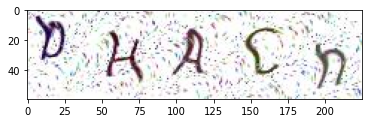

In [2]:
from PIL import Image
import numpy as np

# open method used to open different extension image file
im = Image.open(r"captchas/49334.jpeg") 
plt.imshow(im)

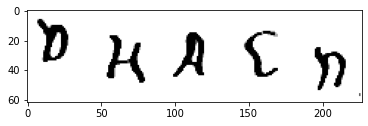

In [25]:
image = cv2.blur(np.array(im), (3, 3))
ret, image = cv2.threshold(image, 178, 255, cv2.THRESH_BINARY)

image = cv2.dilate(image, np.ones((3, 1), np.uint8))
image = cv2.erode(image, np.ones((2, 2), np.uint8))
image = image.mean(axis=2)
image = np.pad(image, 1, constant_values=255)

plt.imshow(image, cmap="gray")

In [26]:
columns = image.mean(axis=0)
columns.shape

(227,)

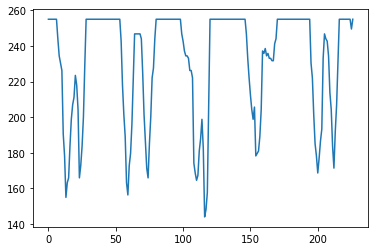

In [27]:
plt.plot(range(columns.shape[0]), list(columns))

In [28]:
indicators = np.where(columns<255, 1, 0)

[7, 28, 54, 80, 99, 120, 147, 170, 195, 216, 225, 226]


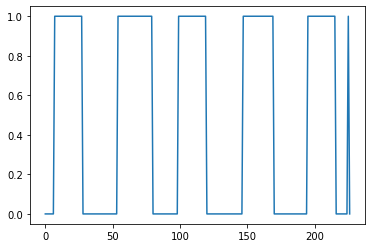

In [29]:
y_points = []
last = 0
for ind in enumerate(indicators):
    if ind[1] == last:
        continue
    last = ind[1]
    y_points.append(ind[0])
print(y_points)
plt.plot(range(columns.shape[0]), indicators)

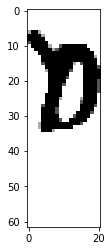

In [8]:
plt.imshow(image[:, y_points[0]:y_points[1]], cmap="gray")

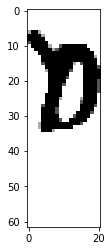

In [9]:
letters = []

for i in range(0, 9, 2):
    letter = image[:, y_points[i]:y_points[i+1]]
    letters.append(letter)
    

plt.imshow(letters[0], cmap="gray")
    

[6, 35]


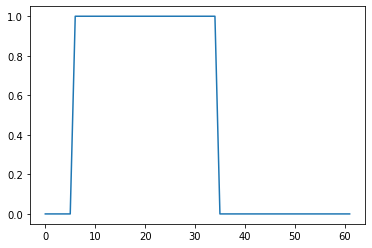

In [10]:
letter = letters[0]
rows = letter.mean(axis=(1))
y_indicators = np.where(rows<250, 1, 0)
points = []
last = 0
for ind in enumerate(y_indicators):
    if ind[1] == last:
        continue
    last = ind[1]
    points.append(ind[0])
print(points)
plt.plot(range(rows.shape[0]), y_indicators)
    

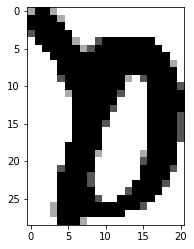

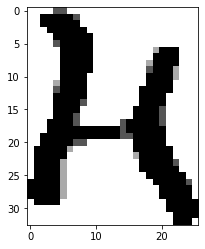

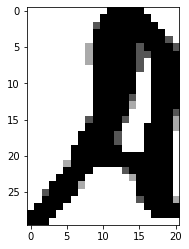

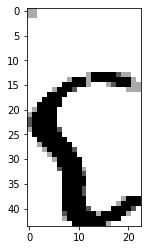

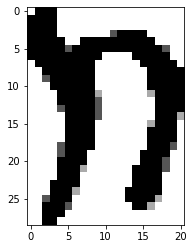

In [11]:

for letter in letters:
    rows = letter.mean(axis=(1))
    y_indicators = np.where(rows<250, 1, 0)
    points = []
    last = 0
    for ind in enumerate(y_indicators):
        if ind[1] == last:
            continue
        last = ind[1]
        points.append(ind[0])
    letter = letter[points[0]:points[-1]]
    plt.figure()
    plt.imshow(letter, cmap="gray")
    